In [4]:
import numpy as np
import pandas as pd

df=pd.read_csv('../input/train.csv')


573518
21694


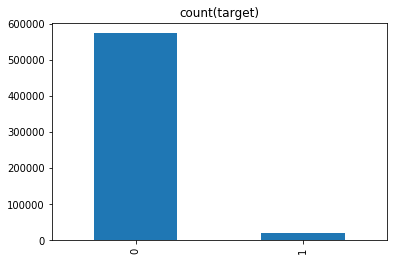

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


target=df['target']
target_count=target.value_counts()
print(target_count[0])
print(target_count[1])
target_count.plot(kind='bar',title='count(target)')

labels=df.columns[2:]
X=df[labels]
y=df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf=LogisticRegression()
clf.fit(X_train,y_train)
predict=clf.predict(X_test)
accuracy=accuracy_score(y_test,predict)

print("Accuracy: %.2f%%" % (accuracy*100))

C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 96.38%


In [58]:
clf= LogisticRegression()
clf.fit(X_train[["ps_ind_09_bin"]],y_train)
y_pred=clf.predict(X_test[["ps_ind_09_bin"]])
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" %(accuracy*100))

C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 96.38%


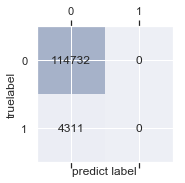

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

conf_mat=confusion_matrix(y_test,y_pred)

fig,ax=plt.subplots(figsize=(2.5,2.5))
#.matshow ヒートマップ関数の表示
ax.matshow(conf_mat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        #図にテキストを挿入
        ax.text(x=j,y=i,s=conf_mat[i,j],va='center',ha='center')

plt.xlabel('predict label')
plt.ylabel('truelabel')
plt.show()

573518
21694


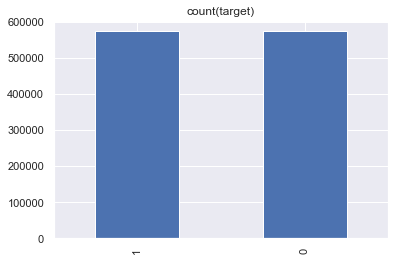

In [85]:
#Resampling
count_0,count_1=df['target'].value_counts()
print(count_0)
print(count_1)

df_label_0=df[df['target']==0]
df_label_1=df[df['target']==1]

# Random under-sampling 少ないデータに合わせて片方のデータを減らす
# sample(number) リストからランダムに要素を取得する
df_label_0_under=df_label_0.sample(count_1)
df_train_under=pd.concat([df_class_0_under,df_label_1],axis=0)

df_train_under.target.value_counts().plot(kind='bar',title='count(target)')

# Random under-sampling 重複を許可（引数replace）
df_label_1_over=df_label_1.sample(count_0,replace=True)
df_train_over=pd.concat([df_label_1_over,df_label_0])

df_train_over.target.value_counts().plot(kind='bar',title='count(target)')

In [126]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.fit_transform(X_test)


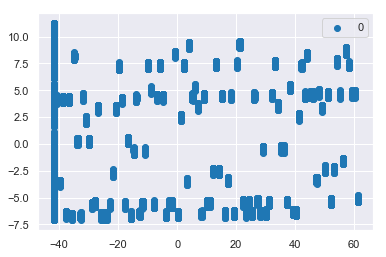

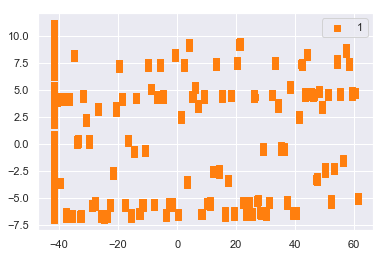

In [123]:
colors = ['#1F77B4', '#FF7F0E']
markers = ['o', 's']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(
        X_train_pca[y_train==l, 0],
        X_train_pca[y_train==l, 1],
        c=c, label=l, marker=m
    )
    plt.legend(loc='upper right')
    plt.show()

In [128]:
clf=LogisticRegression()
clf.fit(X_train_pca,y_train)
y_prob=clf.predict(X_test_pca)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:%.3f%%" % (accuracy*100))

C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy:96.379%


In [141]:
from sklearn.metrics import confusion_matrix,f1_score
print("f1 score :{:.4f}" .format(f1_score(y_test,y_pred)))

f1 score :0.0000


C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
